## <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:red">  Numerical exercises 9: Travelling Salesman Problem - Genetic Algorithm</span>

$\textbf{Introduction}$

Genetic algorithms are a particular type of optimization algorithms. They work in analogy to the evolution of species in nature (Darwin's *natural selection*), that is:
- a starting population of a certain number of individuals is sorted randomly
- a loss/cost function is chosen: it is a characteristic of the individual that has to be optimized (by this we mean that our desire is to have a population where a big number of individuals has that charcteristic optimized)
- a new generation is created from the previous one, where the individuals with best value for the loss/cost function are more likely to procreate than the other ones (one can also include the possibility to have some genetic mutation in the sons when they are created)
- after a certain number of generations the population will be composed of many individuals which realize the optimization of the loss/cost function

We want to apply this type of algorithm to the *travelling salesman problem*: a salesman has to visit a certain number of cities passing from each of them only once, and returning back to the city where he has started the travel; the problem consists in minimizing the length of his journey.

$\textbf{Model of the probem}$

I've made a model of this problem by representing the path with an ordered array of numbers from 0 to the number of cities minus one (each number corresponds to a specific city), e.g. if the path has 10 cities two possible paths are:

$$[1;3;6;8;9;7;0;5;2;4]$$
$$[3;0;7;5;1;4;2;8;6;9]$$

In genetic language, the single city (the number) is a *gene*, the path (the array) is an *individual* and the set of all paths is the *population*.

The loss/cost function to minimize is the total length of the path, which is:

$$L(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|$$

where $N$ is the number of cities in the path.

The code is composed of two analogous parts: in the first one the TSP problem is solved for cities on a circumference of radius R and in the second part the TSP problem is solved for cities inside a square of side L. At the end of each part the best path and the path length as a function of the number of generations are printed in output files.

$\textbf{Class Individual}$

In the code I've implemented the path as a class named *Individual* which contains: 
- two private data members: a vector of integers (the actual path) and the path length
- methods to access and modify private data members (like GetPath, SetCity and so on)
- 5 methods which realize 5 possible genetic mutations of the path

In particular, the five genetic mutation I've implemented are:
1. Pair Permutation  
    This mutation simply exchanges two cities (in positions i and j) randomly chosen in the *path* vector (paying attention not to select the same city), for example:
    
    $$i=3\;,\; j=6\;\Longrightarrow \;[0;3;4;\color{Red}{6};2;9;\color{Red}{1};8;5;7] \rightarrow [0;3;4;\color{Red}{1};2;9;\color{Red}{6};8;5;7]$$
    
    This is obtained via the *swap* function of the class *algorithm*
    
2. Shift  
    This mutation shifts rightward all the cities in the *path* vector by a random number of places (n) selected between 1 and N-1, for example:
    
    $$n=4 \;\Longrightarrow \; [3;5;7;1;0;8;2;4;6;9] \rightarrow [2;4;6;9;3;5;7;1;0;8]$$
    
3. Partial Shift  
    This mutation shifts rigthward n cities of m places from a point j in the *path* vector, where n and m lie between 1 and N/2, whereas j is a random index in the vector, for example:
    
    $$n=3\;,\;m=4\;,\;j=1\; \Longrightarrow \; [3;\color{Red}{1};\color{Red}{2};\color{Red}{7};9;8;5;0;4;6] \rightarrow [3;9;8;5;0;\color{Red}{1};\color{Red}{2};\color{Red}{7};4;6]$$
    
    One can see this mutation as a global shift on the sub-vector which starts from j and has dimension m+n (and this is also how is implemented in the code)
    
4. Permutation  
    This mutation exchanges two random groups of n contiguous cities (choosing indices i and j), for example:
    
    $$i=1\;,\;j=5\;,\;n=2\;\Longrightarrow\;[9;\color{Red}{5};\color{Red}{7};2;4;\color{Red}{3};\color{Red}{0};1;8;6] \rightarrow [9;\color{Red}{3};\color{Red}{0};2;4;\color{Red}{5};\color{Red}{7};1;8;6]$$
    
    Like the *Partial Shift* mutations, this is obtained via the *swap* function of the class *algorithm*
    
5. Inversion  
    This mutation inverts the order of n cities starting from a position j, for example:
    
    $$j=3\;,\;n=4\;\Longrightarrow\;[1;7;4;\color{Red}{2};\color{Red}{6};\color{Red}{3};\color{Red}{9};0;8;5] \rightarrow  [1;7;4;\color{Red}{9};\color{Red}{3};\color{Red}{6};\color{Red}{2};0;8;5]$$
    

N.B. All mutations are implemented in *periodic boundary conditions*, which means that in the *path* vector $N+1 \equiv N$ where $N$ is the number of cities.

$\textbf{Input & Initialize}$

The code starts with the *Input* function, which simply sets the seed for random numbers, reads and prints on the screen the following data:
- number of cities (n_cities)
- number of individuals (n_elements)
- number of generations (n_generations)
- radius R of the circunference
- side L of the square

Then the *Initialize* function is called: it sets the cities randomly on a circumference of the radius R (when called in the first part of the code) or inside a square of side L (when called in the second part of the code), both centered in the origin. The function then computes the *distances* matrix, defined as $M_{ij} = distance\,(city_i, city_j)$. Finally, it sorts the initial population by filling each path with $[0;1;2;\dots;n_{cities}-1]$ and shuffling it with the *shuffle* function of the class *algorithm*; the length of each path is calculated computing the loss/cost function using the *distances* matrix M.

$\textbf{Check & Sort}$

After the *Initialize* function, two functions are called in the main that are going to be called every time a new population is created: the *Check* function checks if all the individuals of the population respect the hypotesis of the TSP problem (namely that all the cities are visited once and only once), otherwise the program is shut down, and the *SortPopulation* function which sorts the population vector from the shortest path to the longest one, using the *sort* function of the class *algorithm*

$\textbf{Generate New Population}$

Starting from the randomly sorted population in the *Initialize* function, a new population is created for n_generations times. The *GenerateNewPopulation* works as follows:

1. Select operator  
    Two individuals (*Mother* and *Father*) are chosen in the sorted *population* vector giving more probability to the shortest paths with j=(int)(n_elements*r^2)) where j indicates the index of the selected Father/Mother and r is a random number between 0 and 1
    
2. Crossing operator (function *Generate*)  
    The individuals *Son* and *Daughter* are created from *Father* and *Mother*: an index j is randomly chosen and up to that index, *Son* is filled with *Father* genes in the order in which they appear, whereas from that index onwards *Son* is filled with *Mother* genes he hasn't heredited from the *Father* in the order in which they appear (the same is done for *Daugther*, inverting the roles of *Mother* and *Father*), for example:
    
    $$Father:\; [0;4;7;3;6;5;2;9;8;1]\;,\; Mother:\; [2;8;9;6;4;5;1;0;3;7]\;, j=6$$
    $$\Rightarrow Son: [0;4;7;3;6;5| A;B;C;D]\;,\; Daughter:\; [2;8;9;6;4;5|E;F;G;H]$$
    
    Now *Son* doesn't have 2, 9, 8 and 1 and these genes in *Mother* appear as 2, 8, 9 and 1, whereas *Daughter* doesn't have 1, 0, 3, 7 and these genes in *Father* appear as 0, 7, 3 and 1; thus we will complete them as:
    
    $$Son: [0;4;7;3;6;5|2;8;9;1]\;,\; Daughter:\; [2;8;9;6;4;5|0;7;3;1]$$
    
3. Mutation probability  
    Either *Son* and *Daughter* have a probability to be modified by one of the five mutations presented before where each mutation is called with probability 5%
    
4. *Son* and *Daughter* are added to the new population

This process is done untin the whole new generation is created, then it is checked and sorted.

The graphs below represent the results obtained in the simulation with the representation of the best path and the trend of path length as a function of the number of generations (both best path length and path length averaged on the best half of the population).

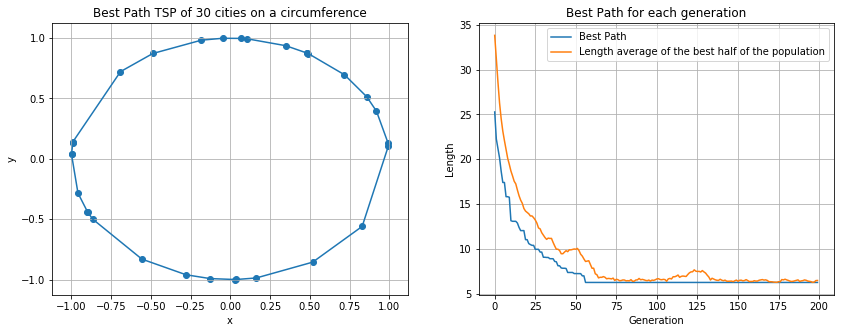

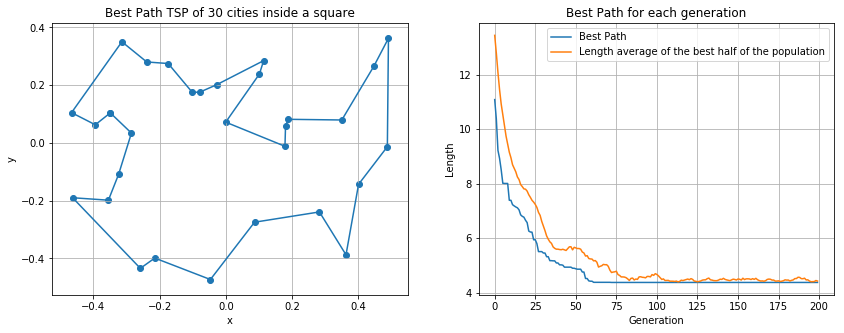

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
x, y = np.loadtxt("BestPathCircle.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Path TSP of 30 cities on a circumference')
plt.grid(True)

plt.subplot(1,2,2)
x, y = np.loadtxt("GenerationBP_Circle.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y, label='Best Path')
plt.xlabel('Generation')
plt.ylabel('Length')
plt.title('Best Path for each generation')
plt.grid(True)

x, y = np.loadtxt("GenerationBP_Circle.txt", usecols=(0,2), delimiter='	', unpack='true')
plt.plot(x, y, label='Length average of the best half of the population')
plt.grid(True)
plt.legend()

plt.show()

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
x, y = np.loadtxt("BestPathSquare.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Path TSP of 30 cities inside a square')
plt.grid(True)

plt.subplot(1,2,2)
x, y = np.loadtxt("GenerationBP_Square.txt", usecols=(0,1), delimiter='	', unpack='true')
plt.plot(x, y, label='Best Path')
plt.xlabel('Generation')
plt.ylabel('Length')
plt.title('Best Path for each generation')
plt.grid(True)

x, y = np.loadtxt("GenerationBP_Square.txt", usecols=(0,2), delimiter='	', unpack='true')
plt.plot(x, y, label='Length average of the best half of the population')
plt.grid(True)
plt.legend()

plt.show()
